# Day 6

## Import necessary libraries

In [8]:
import warnings
from sklearn.datasets import load_iris
import pandas as pd 
from sklearn.cluster import KMeans  # K-Means is a clustering algorithm
from matplotlib import pyplot as plt 
from sklearn.metrics.cluster import silhouette_score    # This is used to evaluate the clustering performance

## Load the dataset

In [9]:
warnings.filterwarnings("ignore")   # We will ignore the warnings
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Apply the clustering algorithm

In [10]:
'''
We will use K-Means with 3 clusters, and we will use random initialization. 
This means that the centroids will be randomly selected from the data. 
Full means that the algorithm will run until convergence.
'''

model = KMeans(n_clusters=3, init = "random", algorithm = "full")
model.fit(data)

KMeans(algorithm='full', init='random', n_clusters=3)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


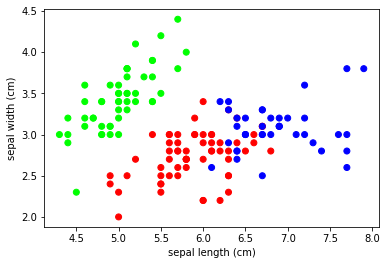

In [11]:
%matplotlib inline
print(model.labels_)    # This is the cluster labels for each data point. The labels are integers from 0 to 2 because we have 3 clusters.
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=model.labels_, cmap="brg")  # This will plot the data points with the cluster labels. brg is a color map (Blue, Red, Green).
plt.xlabel(iris.feature_names[0])   # This will label the x-axis. 0 is the index of the first feature.
plt.ylabel(iris.feature_names[1])   # This will label the y-axis. 1 is the index of the second feature.
plt.show()

## Evaluate the clustering

In [12]:
print(silhouette_score(data, model.labels_))   # We  will print the silhouette score. It is a measure of how well the data points are clustered.

0.551191604619592


## Repeat the evaluation process

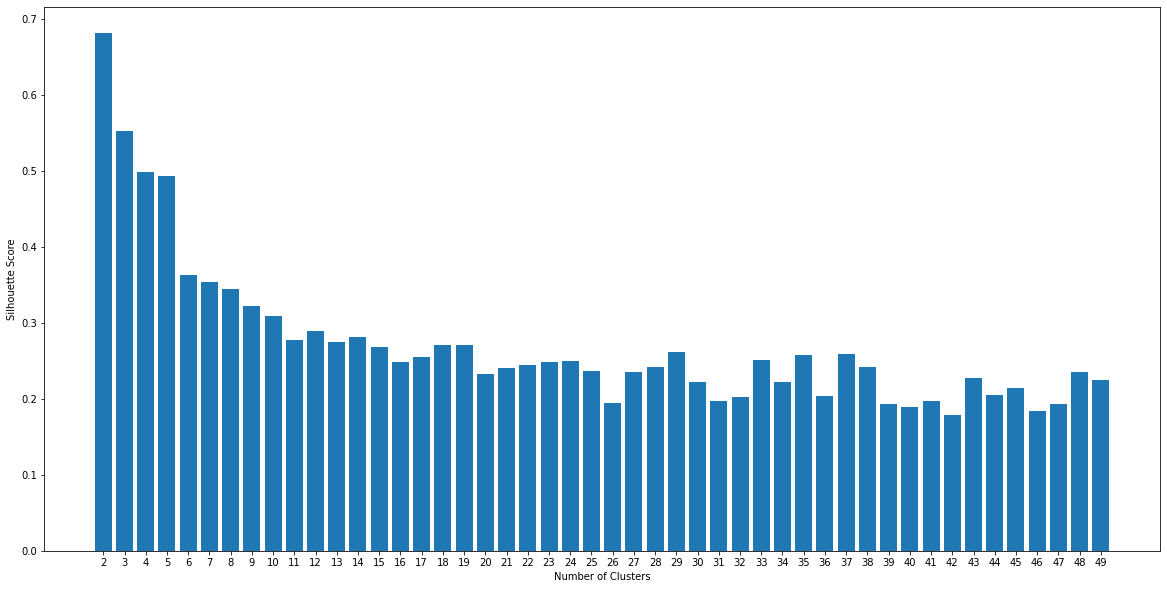

In [15]:
repeat = range(2, 50)  # We will use the range function to create a list of integers from 2 to 50, later to be picked by the for loop
score = []  # We will create an empty list to store the silhouette scores

'''
Now we will just repeateadly apply the clustering algorith like we have done in the previous steps.
Then we will calculate the overall score for each clustering and store them in the score array we created above.
'''
for k in repeat:
    model = KMeans(n_clusters=k, init = "random", algorithm = "full")
    model.fit(data)
    score.append(silhouette_score(data, model.labels_))

plt.figure(figsize=(20, 10))    # We will plot the silhouette score vs the number of clusters. 20 is the width and 10 is the height.
plt.bar(repeat, score)  # We will plot the silhouette score vs the number of clusters (repeat).
plt.xticks(repeat)  # We will label the x-axis with the number of clusters.
plt.xlabel("Number of Clusters")   # We will label the x-axis.
plt.ylabel("Silhouette Score")   # We will label the y-axis to keep track of the score.
plt.show()